In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf


os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image

from PIL import Image

In [2]:
test_model = tf.keras.models.load_model('Models/Model1_DD.keras')

test_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 128)     

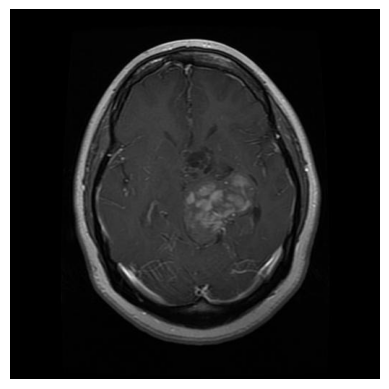

In [3]:
image_path = '../Training/glioma_tumor/gg (1).jpg'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Actual test

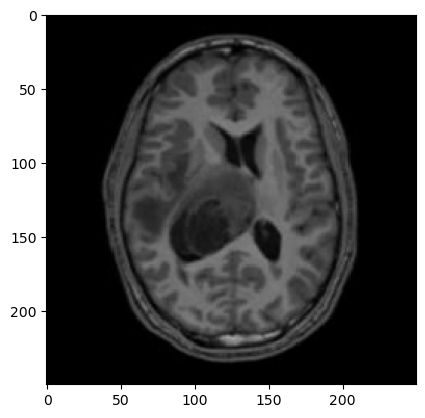

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
image_width = 250
image_height = 250

# Path to your specific image
image_path = '../Testing/no_tumor/image(23).jpg'

# Load the image and resize it to match the input shape of your model
img = image.load_img(image_path, target_size=(image_width, image_height))

# Display the loaded image
plt.imshow(img)
plt.axis('on')  # Remove axes for clarity
plt.show()

# Convert the image to a numpy array
# img_array = image.img_to_array(img)

# Rescale the image
img_array = image.img_to_array(img) / 255.
# img_array /= 255.

# extra dimension for the batch size
img_array = np.expand_dims(img_array, axis=0)
img_array

In [5]:
predictions = test_model.predict(img_array)

# Print
print(predictions)

1/1 [==============================] - 0s 239ms/step
[[1.1935006e-03 4.4387341e-02 9.5441413e-01 5.0715598e-06]]


In [6]:
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

Predicted class: [2]


In [7]:
class_names = ['glioma', 'meningioma', 'no', 'pituitary'] 
print(f"Predicted class name: {class_names[predicted_class[0]]}")

Predicted class name: no
